Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [1]:
import unicodecsv

with open('./dataset/enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [2]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.

with open('./dataset/daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
    
with open('./dataset/project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)

print(daily_engagement[0])
print(project_submissions[0])

{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


## Fixing Data Types

In [3]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]

{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [4]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [5]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [6]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.
def get_unique_student(dataset):
    students = set()
    for row in dataset:
        students.add(row["account_key"])
    return students

## Problems in the Data

In [7]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for de in daily_engagement:
    de["account_key"] = de.pop('acct')
print daily_engagement[0]["account_key"]

0


In [8]:
for dataset in [("enrollments", enrollments), 
                ("project_submissions", project_submissions), 
                ("daily_engagement", daily_engagement)]:
    print dataset[0], len(get_unique_student(dataset[1]))

enrollments 1302
project_submissions 743
daily_engagement 1237


## Missing Engagement Records

In [9]:
import operator as op
def filter_dataset(dataset, key, operator, value, reverse=False):
    filtered = [ ]
    operators = {"==": op.eq, ">": op.gt, "<": op.lt, ">=": op.ge, "<=": op.le, "!=": op.ne,
                 "in": op.contains, "is": op.is_}
    func = operators[operator]
    dataset[0][key]
    for row in dataset:
        if func(value, row[key]) != reverse:
            filtered.append(row)
    return filtered

In [10]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
enrollments_accounts = get_unique_student(enrollments)
engagment_accounts = get_unique_student(daily_engagement)
missing_engagement_accounts = enrollments_accounts - engagment_accounts
print len(missing_engagement_accounts)
filtered_enrollments = filter_dataset(enrollments, "account_key", "in", missing_engagement_accounts)
print len(filtered_enrollments)
for row in filtered_enrollments[:10]:
    print row

65
71
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 13, 0, 0), u'account_key': u'871', u'cancel_date': datetime.datetime(2014, 11, 13, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 15, 0, 0), u'account_key': u'1218', u'cancel_date': datetime.datetime(2014, 11, 15, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 12, 4, 0, 0), u'account_key': u'654', u'cancel_date': datetime.datetime(2014, 12, 4, 0, 0), u'days_to_cancel': 0}
{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2

## Checking for More Problem Records

In [11]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.
number_of_different_dates = 0
for row in filtered_enrollments:
    if row["join_date"] != row["cancel_date"]:
        print row
        number_of_different_dates += 1
print number_of_different_dates

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


## Tracking Down the Remaining Problems

In [12]:
# Create a set of the account keys for all Udacity test accounts
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

6

In [13]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [14]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


## Refining the Question

In [15]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

paid_students = {}
for row in non_udacity_enrollments:
    if row["days_to_cancel"] is None or row["days_to_cancel"] > 7:
        account = row["account_key"]
        enrollment_date = row["join_date"]
        if account not in paid_students:
            paid_students[account] = enrollment_date
        elif enrollment_date > paid_students[account]:
            paid_students[account] = enrollment_date
print len(paid_students)

995


## Getting Data from First Week

In [16]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return 0 <= time_delta.days < 7

In [17]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

paid_engagement_in_first_week = [ ]
for row in non_udacity_engagement:
    account = row["account_key"]
    try:
        join_date = paid_students[account]
    except KeyError:
        continue
    if within_one_week(join_date, row["utc_date"]):
        paid_engagement_in_first_week.append(row)
print len(paid_engagement_in_first_week)

6919


## Exploring Student Engagement

In [18]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [19]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [20]:
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [21]:
#####################################
#                 8                 #
#####################################

## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

outliers = {account: total_minutes_visited for (account, total_minutes_visited) in total_minutes_by_account.iteritems() 
            if total_minutes_visited > 7*24*60}
print outliers

for account in outliers.iterkeys():
    for engagement in engagement_by_account[account]:
        print engagement

{}


If dictionnary is empty, the "bug has been fixed. Else: Engagements are within a 4 month period or so. It should have been only first week right ?

In [22]:
enrollment_outliers = filter_dataset(non_udacity_enrollments, "account_key", "in", outliers.keys())
print enrollment_outliers

[]


If list is empty, the bug has been fixed. Else: The outliers has multiple entries in enrollments dataset. Let's see if others have the same characteristics:

In [23]:
print len(engagement_by_account)
number_of_enrollments = { }
for account in engagement_by_account.iterkeys():
    interest = filter_dataset(non_udacity_enrollments, "account_key", "==", account)
    number_of_enrollments[account] = len(interest)
number_of_multiple_enrollments = 0
for (account, count) in number_of_enrollments.iteritems():
    if count > 1:
        number_of_multiple_enrollments += 1
print number_of_multiple_enrollments

995
218


218 accounts have multiple enrollments. The consequence is that time delta may be negative as we keep only the more recent enrollment. This results in counting too much engagements for severall accounts. the function has to be updated from:

```python
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7
```

to:

```python
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return 0 <= time_delta.days < 7
```

## Lessons Completed in First Week

In [24]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the number of lessons completed by each student during the first week. Try creating
## one or more functions to re-use the code above.

def aggregate_engagements(data, key):
    aggregate_by_account = { }
    for account_key, engagement_for_student in data.items():
        aggregate = 0
        for engagement_record in engagement_for_student:
            aggregate += engagement_record[key]
        aggregate_by_account[account_key] = aggregate
    aggregate = aggregate_by_account.values()
    print 'Mean:', np.mean(aggregate)
    print 'Standard deviation:', np.std(aggregate)
    print 'Minimum:', np.min(aggregate)
    print 'Maximum:', np.max(aggregate)
        
aggregate_engagements(engagement_by_account, "total_minutes_visited")
aggregate_engagements(engagement_by_account, "lessons_completed")

Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645
Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


## Number of Visits in First Week

In [25]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.

engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0
    engagement_by_account[account_key].append(engagement_record)
    
aggregate_engagements(engagement_by_account, "has_visited")

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [26]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

subway_project_lesson_keys = ['746169184', '3176718735']

#We only keep the submission of non udacity accounts, in the first 7 days:
paid_submissions = [ ]
for row in non_udacity_submissions:
    account = row["account_key"]
    try:
        join_date = paid_students[account]
    except KeyError:
        continue
    paid_submissions.append(row)
print "Total of submissions for paid students: ", len(paid_submissions)

#We first filter project submissions related to the project to analyze:
filtered_project_submissions = filter_dataset(paid_submissions, "lesson_key", 
                                              "in", subway_project_lesson_keys)

#We list passed projects and non-passed ones:
passed_project_submissions = filter_dataset(filtered_project_submissions, 
                                            "assigned_rating", "in", ["PASSED", "DISTINCTION"])
print passed_project_submissions[0]

#Now we collect list of students who have passed the projects and list of students who have failed at least once:
passing_students = set([row["account_key"] for row in passed_project_submissions])
non_passing_students = set(paid_students.keys()) - passing_students

#We remove from non-passing list students any student who has passed the project
print "Number of students who have passed: ", len(passing_students)
print "Number of students who have not passed: ", len(non_passing_students)


#We now filter engagements based on student list:
passing_engagement = filter_dataset(paid_engagement_in_first_week, "account_key", "in", passing_students)
non_passing_engagement = filter_dataset(paid_engagement_in_first_week, "account_key", "in", non_passing_students)

print len(passing_engagement)
print len(non_passing_engagement)

Total of submissions for paid students:  3618
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'PASSED', u'completion_date': datetime.datetime(2015, 1, 20, 0, 0), u'creation_date': datetime.datetime(2015, 1, 20, 0, 0)}
Number of students who have passed:  647
Number of students who have not passed:  348
4527
2392


## Comparing the Two Student Groups

In [27]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).

def aggregate_from_list(data, key):
    aggregate_by_account =defaultdict(lambda : 0)
    for row in data:        
        account_key = row["account_key"]
        aggregate_by_account[account_key] += row[key]
    aggregate = aggregate_by_account.values()
    print 'Mean:', np.mean(aggregate)
    print 'Standard deviation:', np.std(aggregate)
    print 'Minimum:', np.min(aggregate)
    print 'Maximum:', np.max(aggregate)
    return aggregate

print "Passing students"
print "----------------"
print "Total minutes visited"
passed_minutes = aggregate_from_list(passing_engagement, "total_minutes_visited")
print "Lessons completed"
passed_lessons = aggregate_from_list(passing_engagement, "lessons_completed")
print "Number of visits"
passed_visits = aggregate_from_list(passing_engagement, "has_visited")

print "\n"
print "Non-passing students"
print "--------------------"
print "Total minutes visited"
non_passed_minutes = aggregate_from_list(non_passing_engagement, "total_minutes_visited")
print "Lessons completed"
non_passed_lessons = aggregate_from_list(non_passing_engagement, "lessons_completed")
print "Number of visits"
non_passed_visits = aggregate_from_list(non_passing_engagement, "has_visited")


Passing students
----------------
Total minutes visited
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645
Lessons completed
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0
Maximum: 36
Number of visits
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0
Maximum: 7


Non-passing students
--------------------
Total minutes visited
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933
Lessons completed
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0
Maximum: 27
Number of visits
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0
Maximum: 7


## Making Histograms

(array([ 272.,   34.,   17.,    9.,    6.,    2.,    1.,    5.,    0.,    2.]),
 array([    0.        ,   176.85227493,   353.70454987,   530.5568248 ,
          707.40909973,   884.26137467,  1061.1136496 ,  1237.96592453,
         1414.81819947,  1591.6704744 ,  1768.52274933]),
 <a list of 10 Patch objects>)

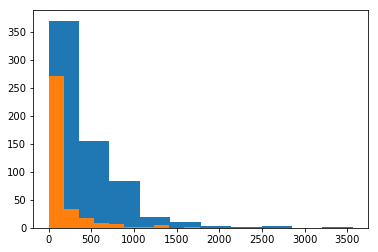

In [28]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(passed_minutes)
plt.hist(non_passed_minutes)

(array([ 317.,   17.,    6.,    4.,    1.,    1.,    0.,    1.,    0.,    1.]),
 array([  0. ,   2.7,   5.4,   8.1,  10.8,  13.5,  16.2,  18.9,  21.6,
         24.3,  27. ]),
 <a list of 10 Patch objects>)

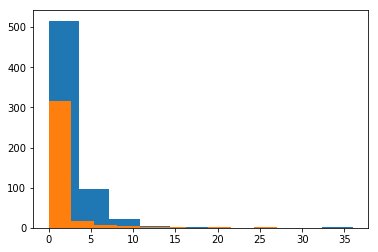

In [29]:
plt.hist(passed_lessons)
plt.hist(non_passed_lessons)

(array([ 97.,  90.,  56.,   0.,  41.,  15.,   0.,  24.,  17.,   8.]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ]),
 <a list of 10 Patch objects>)

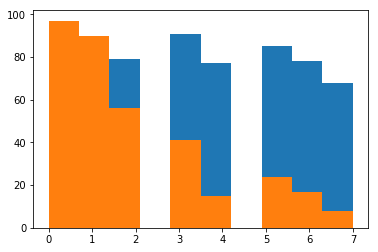

In [30]:
plt.hist(passed_visits)
plt.hist(non_passed_visits)

## Improving Plots and Sharing Findings

(array([ 87.,  82.,  79.,  91.,  77.,  85.,  78.,  68.]), array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5]), <a list of 1 Patch objects>)


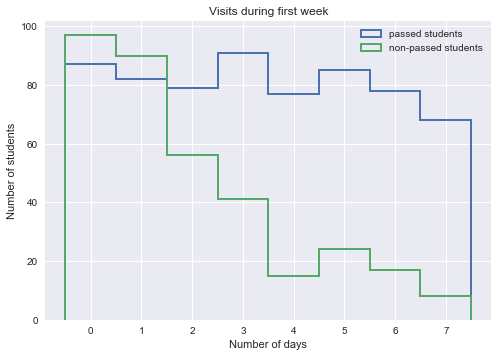

In [78]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.

import seaborn as sns

bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]
histtype = 'step'
out = plt.hist(passed_visits, bins=bins, label="passed students", histtype=histtype, linewidth=2.0)
plt.hist(non_passed_visits, bins=bins, label="non-passed students", histtype=histtype, linewidth=2.0)
plt.title("Visits during first week")
plt.xlabel("Number of days")
plt.ylabel("Number of students")
plt.legend()
print out